In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import geopandas as gpd

data_path = 'METR-LA'
FILE = f'{data_path}/metr-la.h5'
locations_file = f'{data_path}/graph_sensor_locations.csv'
alpha = 0.1

with pd.HDFStore(FILE) as store:
    print(store.keys())
    df = store[store.keys()[0]]
    
df.replace(0, np.nan, inplace=True)

['/df']


In [2]:
def is_bimodal(data, alpha = 0.2):
    kde_values = sns.kdeplot(data, bw_adjust = 2).get_lines()[0].get_data()
    mode = kde_values[0][np.argmax(kde_values[1])]
    local_minima_indices = argrelextrema(kde_values[1], np.less)
    valley = kde_values[0][local_minima_indices]
    threshold = 0
    proportion = 0
    for v in valley:
        thresh = v
        if thresh < mode - 10:
            prop = sum(data < thresh)/len(data.dropna())
            if abs(prop - 0.5) < abs(proportion - 0.5):
                proportion = prop
                threshold = thresh
    if min(proportion, 1 - proportion) > alpha:
        print(f"threshold: {threshold}, prop: {proportion}, mode: {mode}")
        plt.hist(data, bins = 100)
        plt.axvline(x=threshold, color='red', linestyle='--')
        plt.show()

    plt.clf()
    # compute the lower quantile, median and upper quantile of each group
    group1 = data[data < threshold]
    group2 = data[data >= threshold]
    group1_median = group1.median()
    group2_median = group2.median()
    group1_lower = group1.quantile(0.25)
    group2_lower = group2.quantile(0.25)
    group1_upper = group1.quantile(0.75)
    group2_upper = group2.quantile(0.75)

    return min(proportion, 1 - proportion), threshold, group1_lower, group1_median, group1_upper, group2_lower, group2_median, group2_upper

threshold: 53.853708125396764, prop: 0.5474551227639977, mode: 65.1223497652648


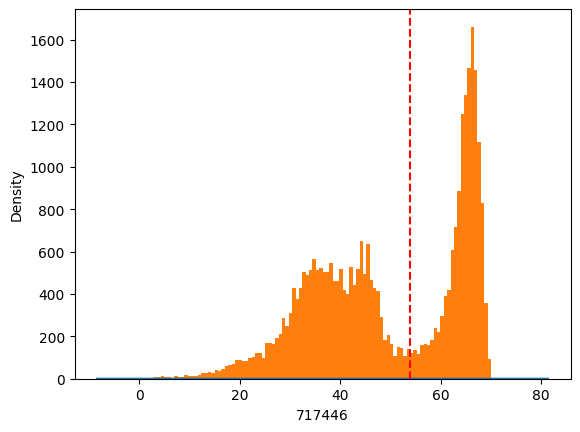

threshold: 44.31652634070291, prop: 0.14341350947158524, mode: 64.14642115002046


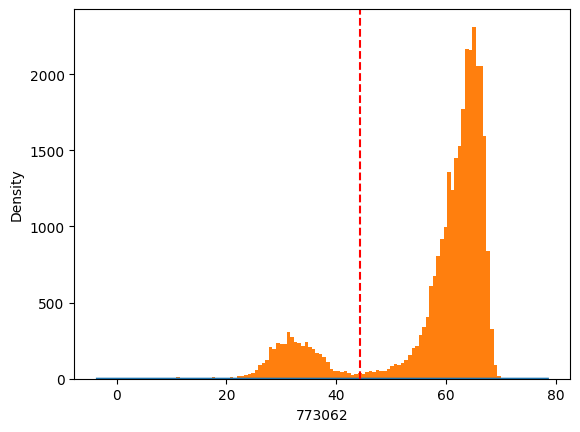

threshold: 45.092817753225916, prop: 0.1984417534966676, mode: 66.73815011947927


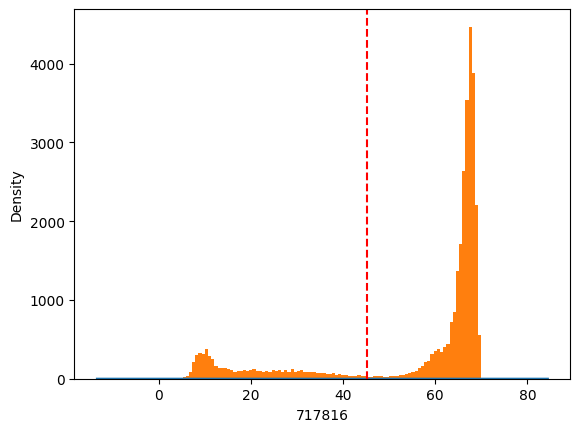

threshold: 41.811143985523415, prop: 0.5089661624824575, mode: 64.16295772849504


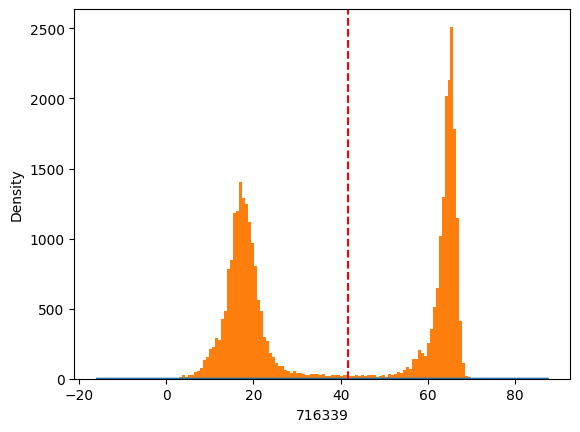

threshold: 52.84818712484153, prop: 0.531398252184769, mode: 65.48515259047339


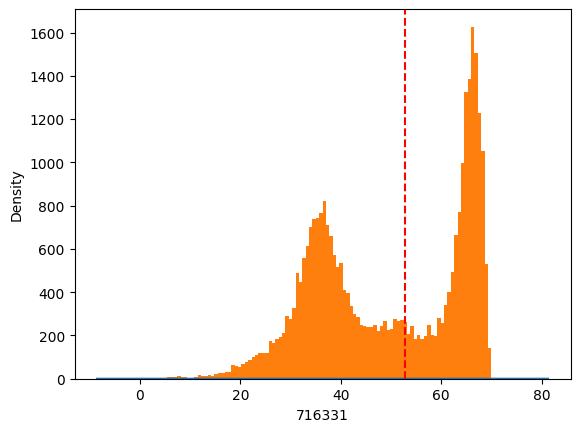

threshold: 37.817457213466135, prop: 0.12003042245730484, mode: 51.14547677888447


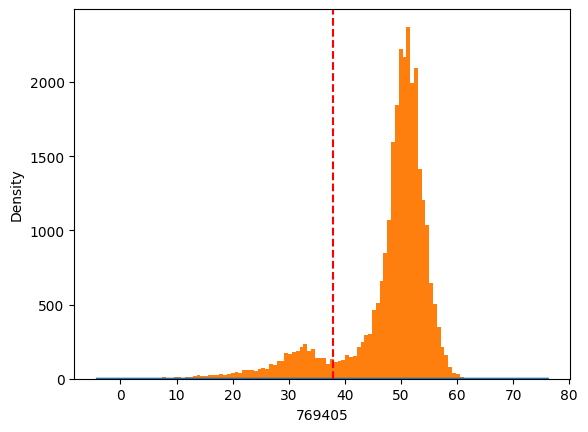

threshold: 34.47737806362734, prop: 0.11326037159582591, mode: 60.18410943837511


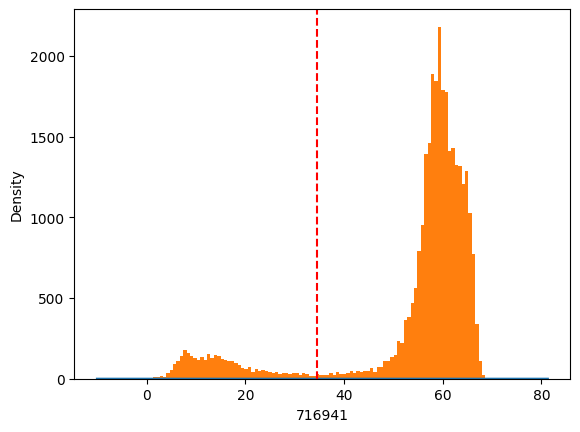

threshold: 40.99017476295933, prop: 0.1515277688809173, mode: 64.05262755729758


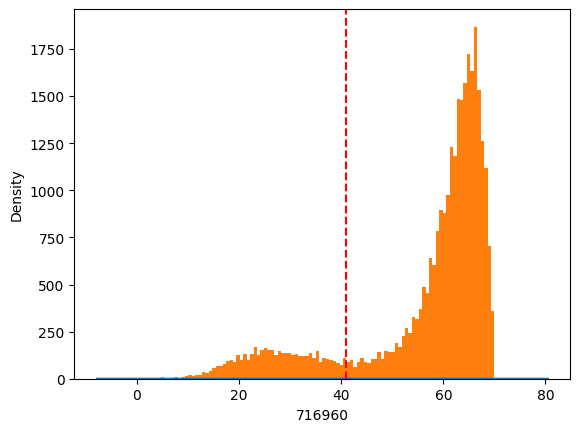

threshold: 38.72817880102768, prop: 0.27499351659751037, mode: 61.57375185445436


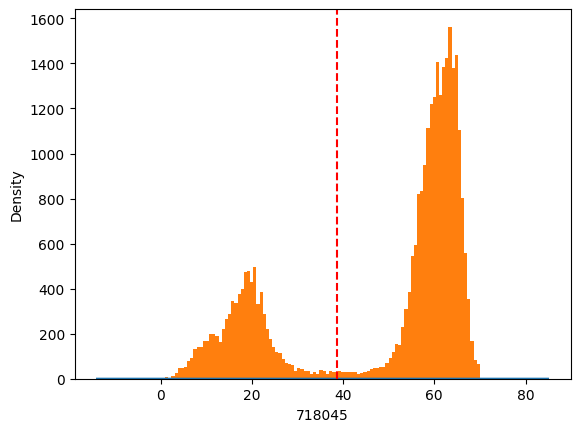

threshold: 50.922066479941506, prop: 0.2407621247113164, mode: 63.559462881232


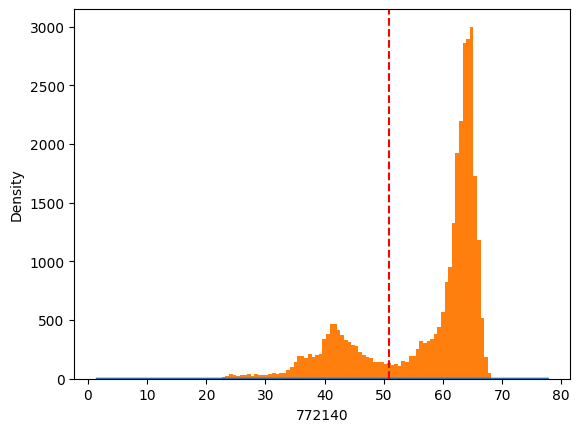

threshold: 42.89098130807977, prop: 0.12417921977597528, mode: 65.79422333071624


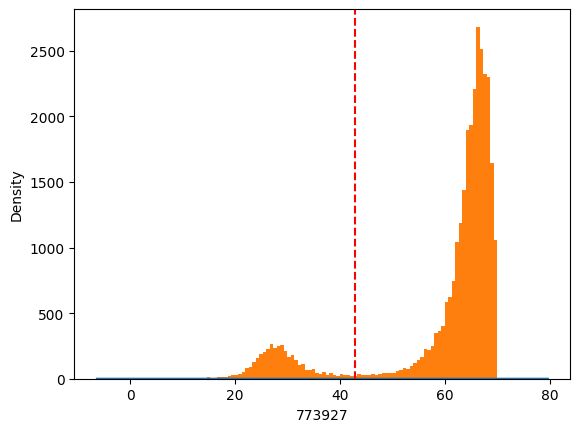

threshold: 40.51637457510835, prop: 0.1959838107098381, mode: 63.162658347032234


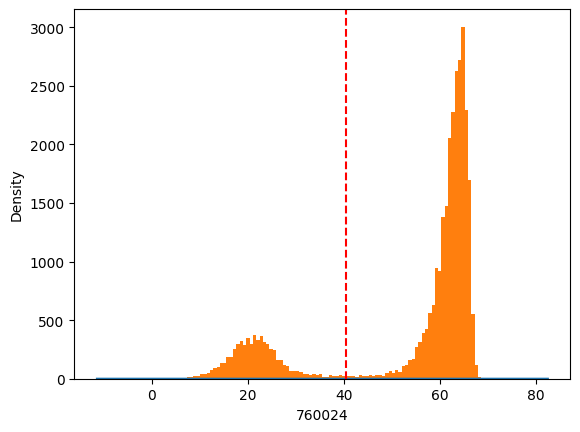

threshold: 46.02310801734619, prop: 0.2567753215936056, mode: 62.54290716061119


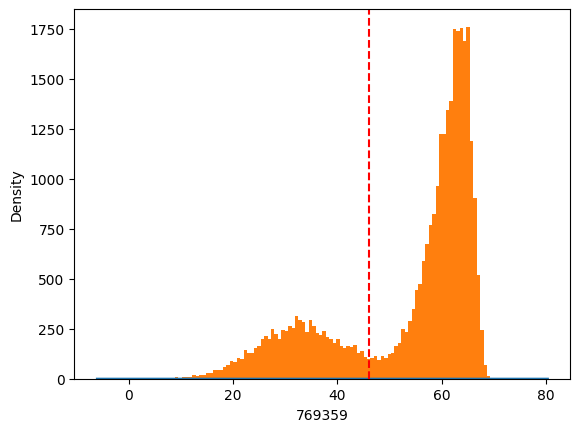

threshold: 36.83582366118488, prop: 0.17971922867832815, mode: 56.9105334967314


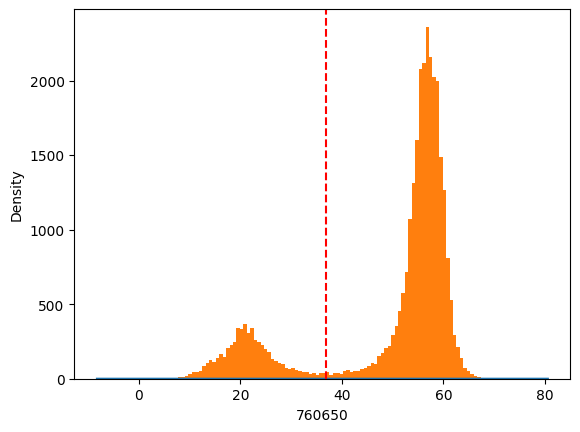

threshold: 48.91551010061259, prop: 0.2514045384639528, mode: 66.87750624329955


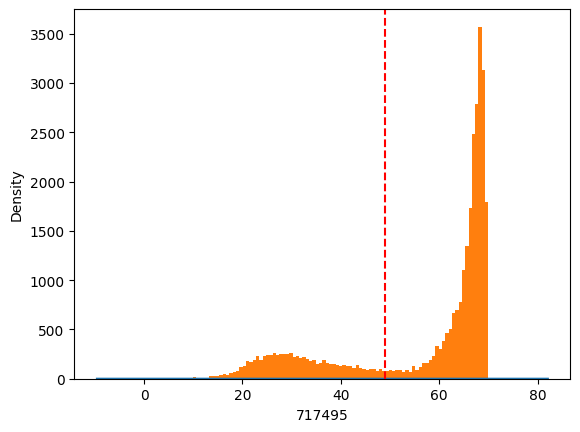

threshold: 42.693315411747506, prop: 0.10004986909362923, mode: 62.520587622181516


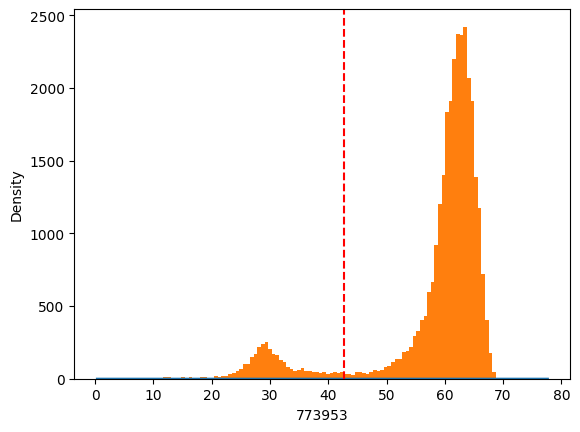

threshold: 26.980495398529772, prop: 0.17406048861512907, mode: 42.708811585859436


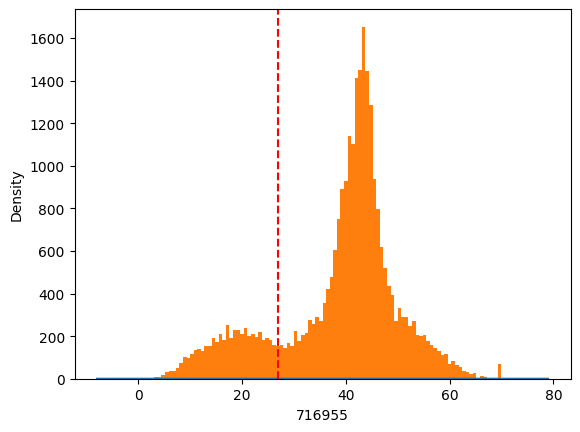

threshold: 41.25638595355385, prop: 0.10183597768149372, mode: 59.09266994939859


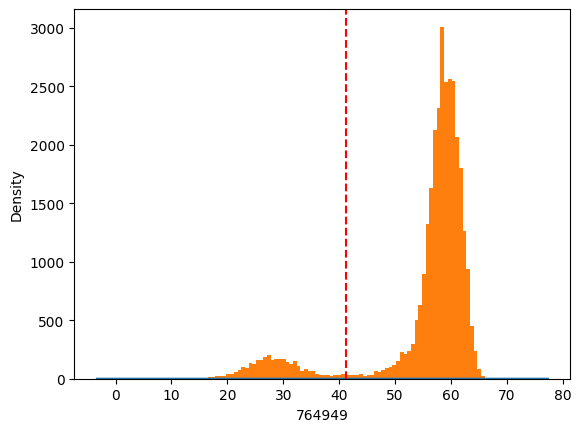

threshold: 45.16350631721947, prop: 0.22759950330043788, mode: 62.24319190114227


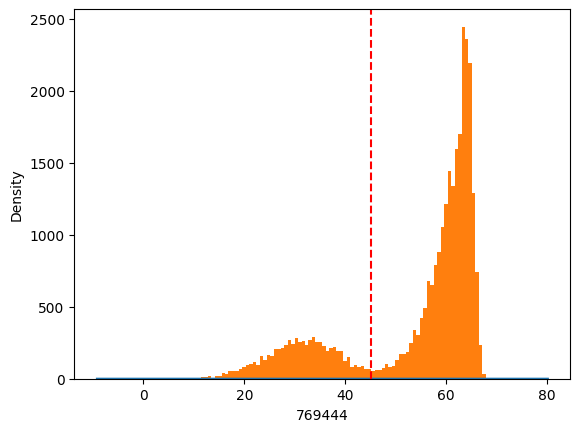

threshold: 33.12392738776758, prop: 0.19341756356262674, mode: 65.00965351009185


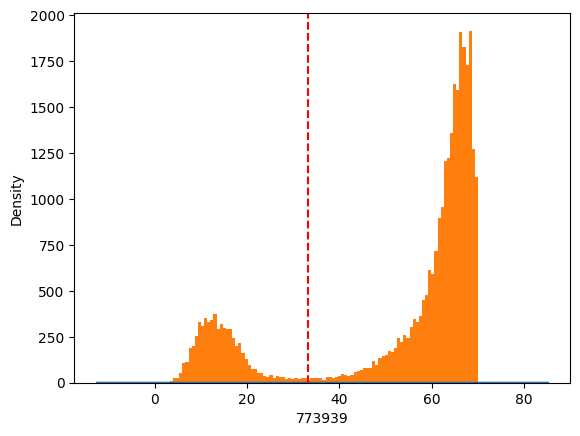

threshold: 42.40458204109205, prop: 0.16169837222984898, mode: 65.56834114669118


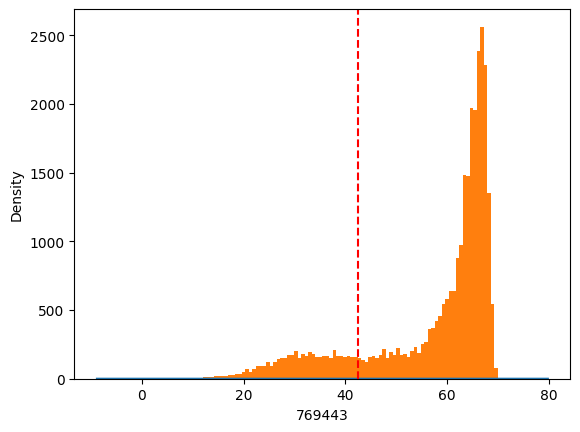

threshold: 50.46932602801143, prop: 0.11604084936795567, mode: 67.20080421633318


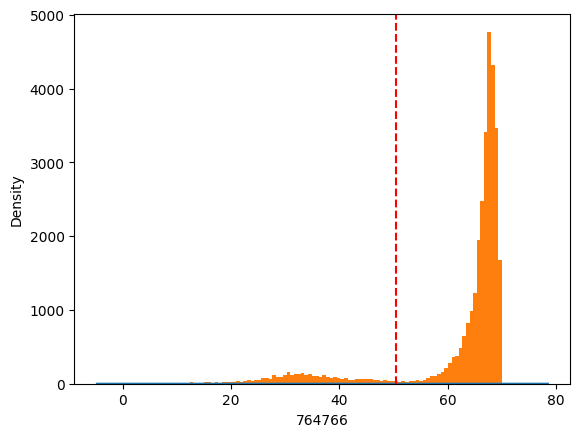

threshold: 45.17075011871342, prop: 0.16567345792642976, mode: 65.93810177807798


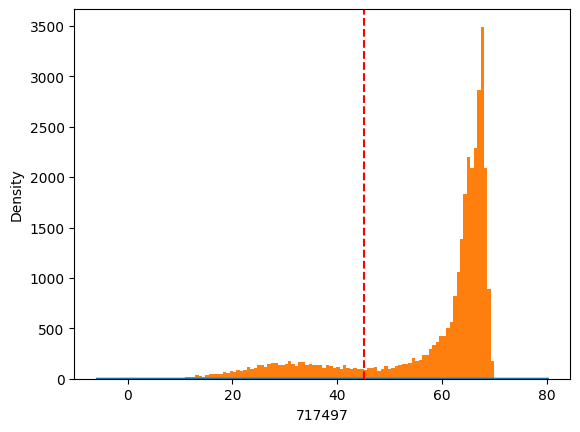

threshold: 46.754583418872585, prop: 0.3232983470554962, mode: 62.772048085278584


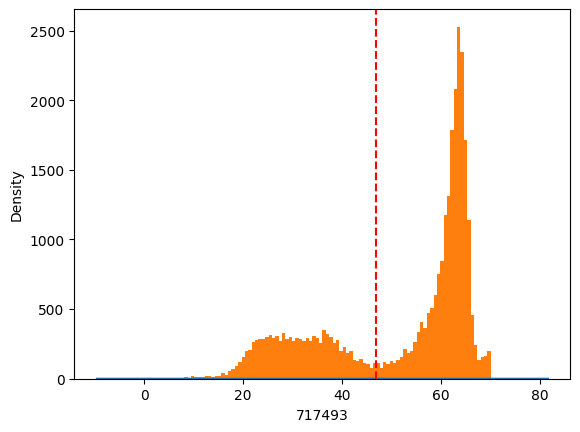

threshold: 49.755365430140245, prop: 0.1171662975325202, mode: 67.57535147873391


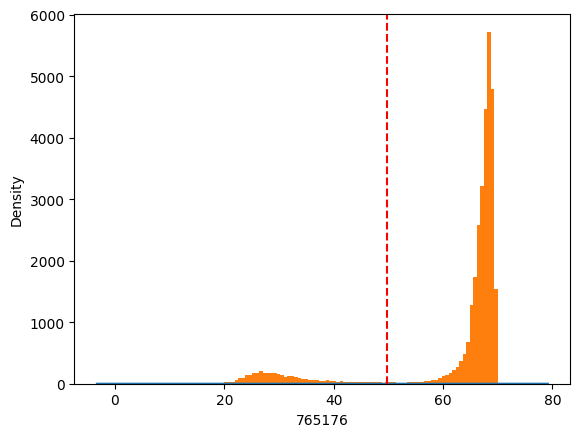

threshold: 35.520729360155215, prop: 0.16981190929224244, mode: 54.06343575860308


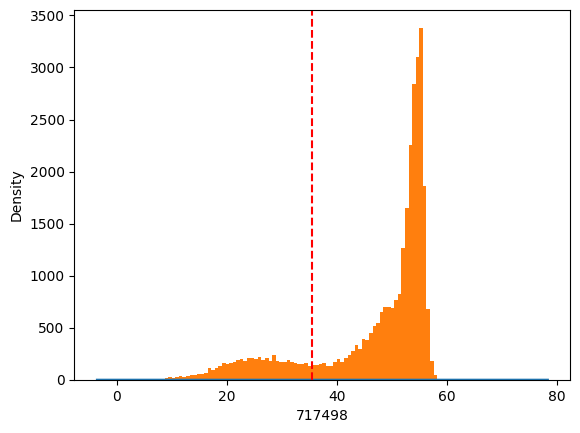

threshold: 36.6849792132502, prop: 0.1769825918762089, mode: 58.30855516355415


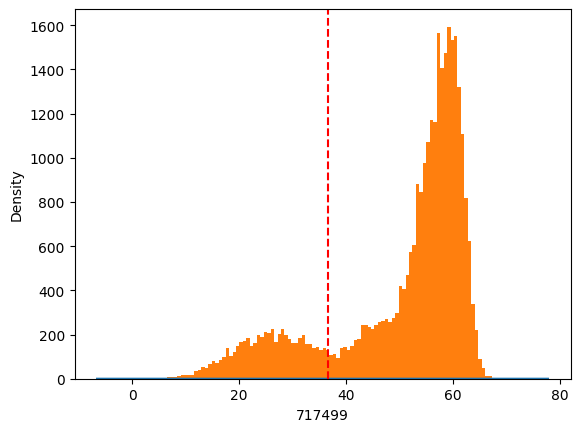

threshold: 32.24400633432814, prop: 0.13360157141046763, mode: 63.553942991046775


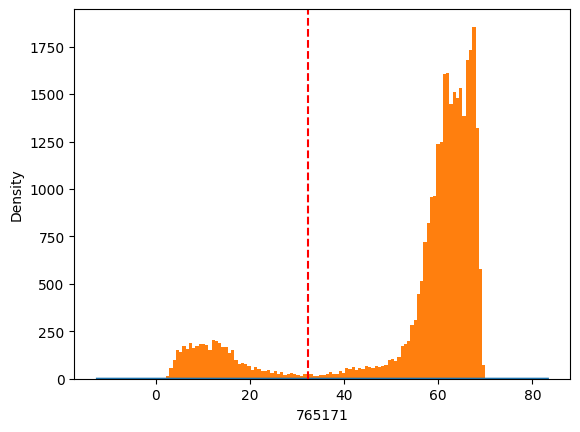

threshold: 44.271207898937064, prop: 0.28350599692800416, mode: 60.94925779002462


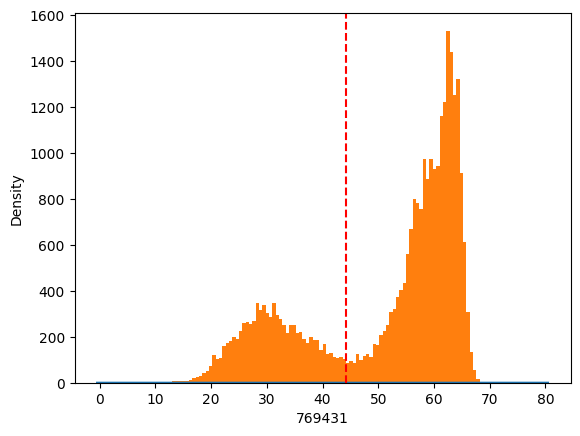

threshold: 42.672991350166484, prop: 0.23061887092499336, mode: 65.02299396411605


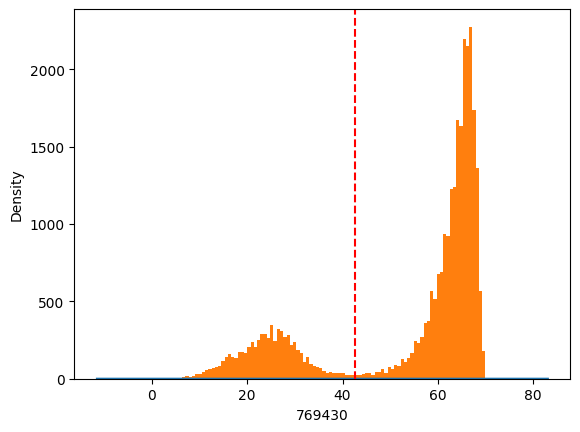

threshold: 30.15553517224519, prop: 0.13247756729810567, mode: 57.749844418502136


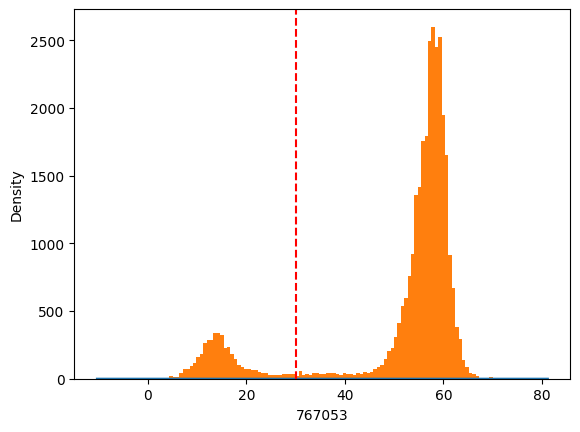

threshold: 54.72432300834339, prop: 0.22321150613286844, mode: 65.31389291952624


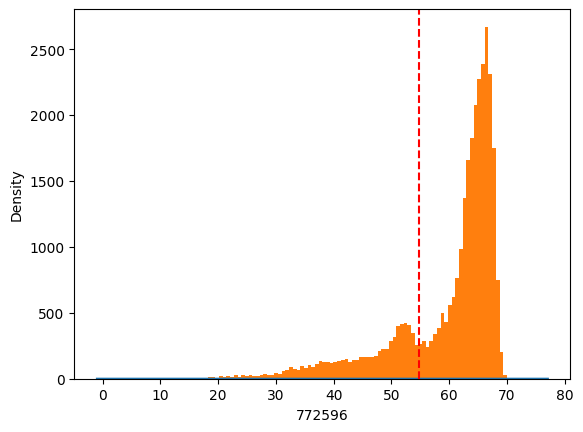

threshold: 48.446081142293764, prop: 0.16793275217932752, mode: 66.61330714677044


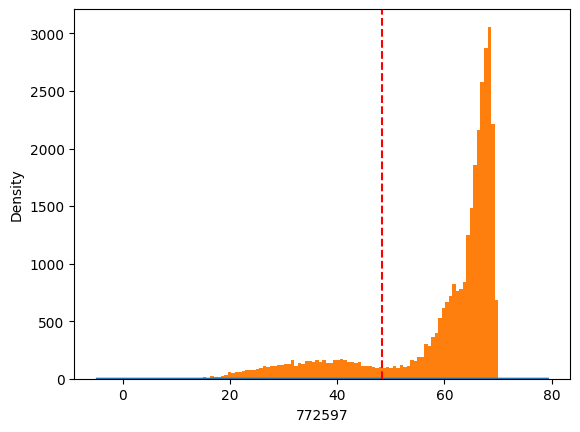

threshold: 39.85909381702173, prop: 0.1116926815590242, mode: 65.67490012609487


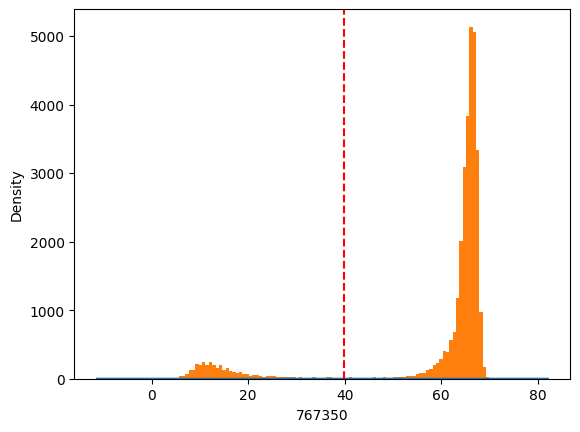

threshold: 39.71365041151715, prop: 0.5052172558791466, mode: 52.40609247882897


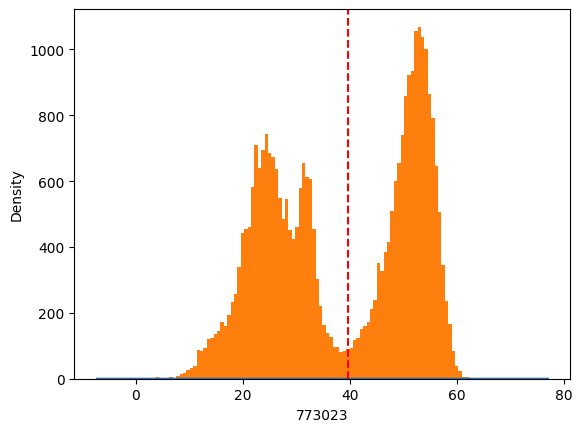

threshold: 48.096248741798036, prop: 0.13671690632768005, mode: 63.398464677838504


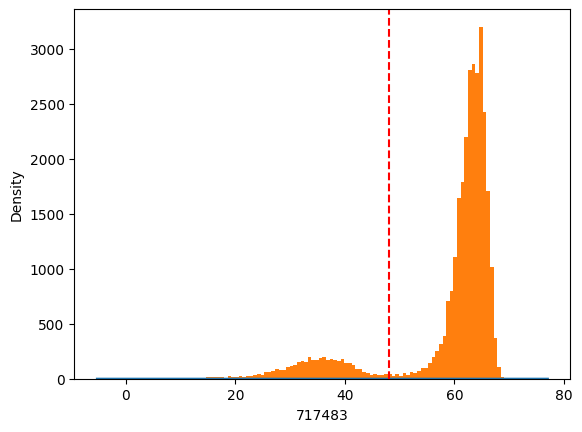

threshold: 40.36230013396131, prop: 0.14629494230219028, mode: 61.841992038888606


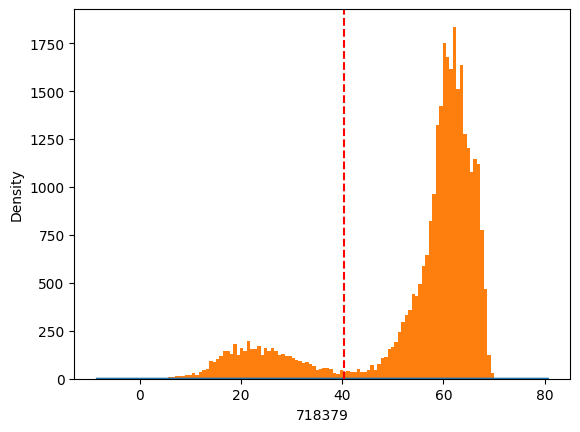

threshold: 47.296421778088956, prop: 0.1235149209516979, mode: 67.45111972668862


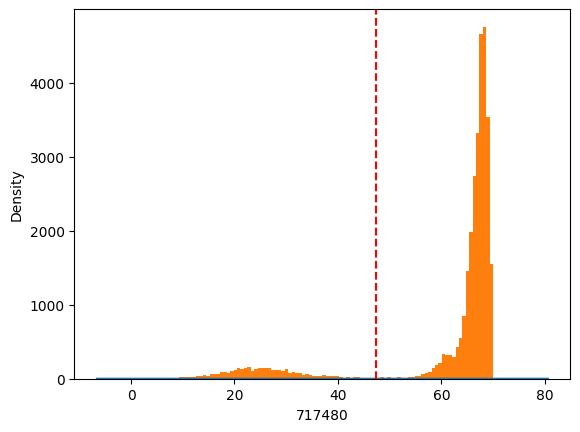

threshold: 42.92242260695313, prop: 0.12093255205086648, mode: 59.4638215595915


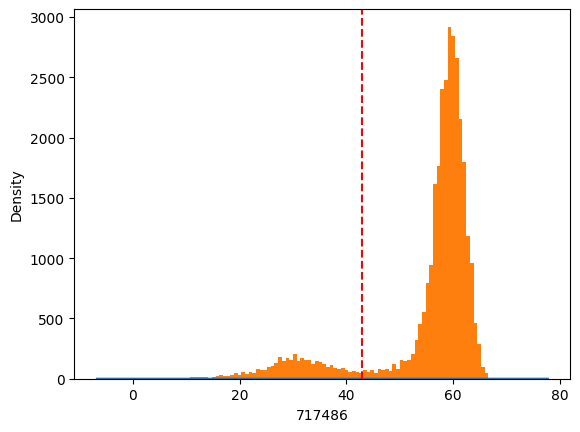

threshold: 43.30678816361261, prop: 0.20267364681686453, mode: 63.01359362560949


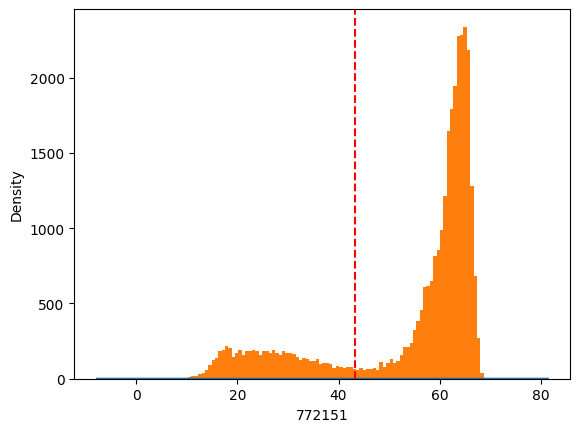

threshold: 41.92500714372284, prop: 0.13850433225693, mode: 63.1096818761895


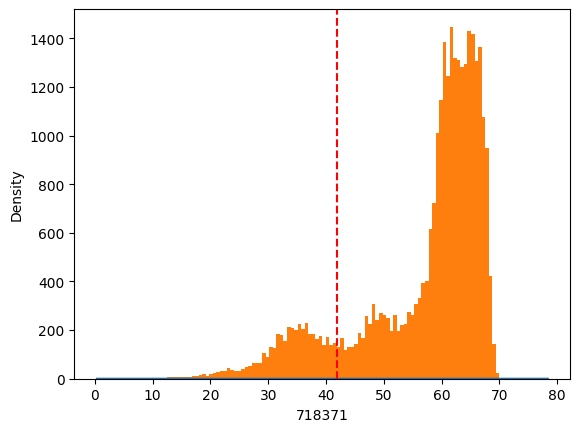

threshold: 40.48787502621906, prop: 0.1086035343231112, mode: 60.98655375496199


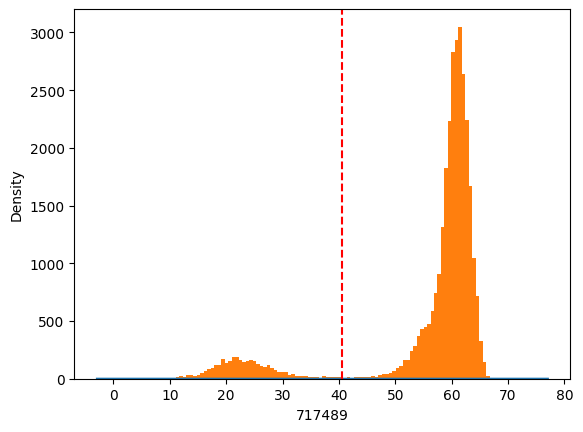

threshold: 45.21830301993492, prop: 0.10266741629185407, mode: 65.36994217979269


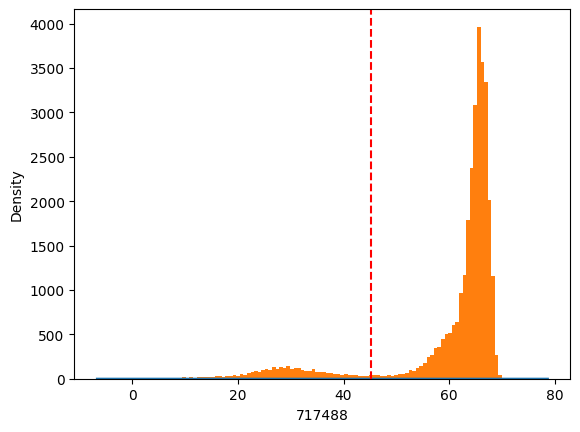

threshold: 42.45362915415862, prop: 0.13791762532810525, mode: 60.61489037207117


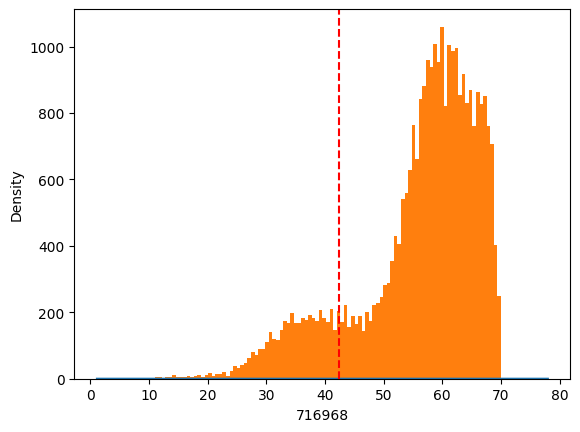

threshold: 43.273026388568944, prop: 0.13682932145859933, mode: 63.57712021459187


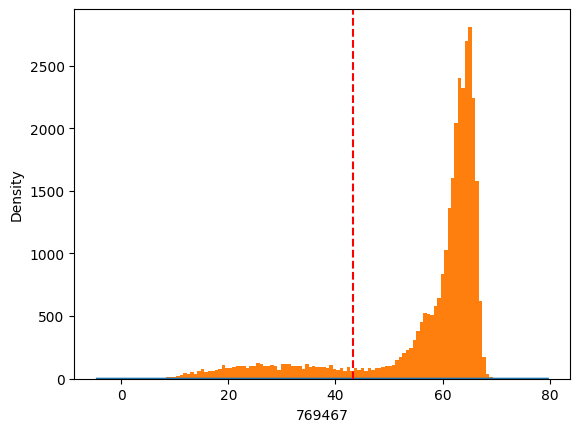

threshold: 49.32667601910633, prop: 0.12971271888826572, mode: 66.54884215807259


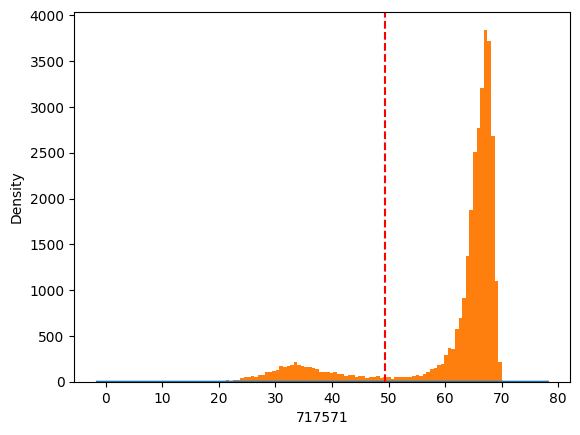

threshold: 46.193132147074756, prop: 0.12818116686913997, mode: 66.69412449144492


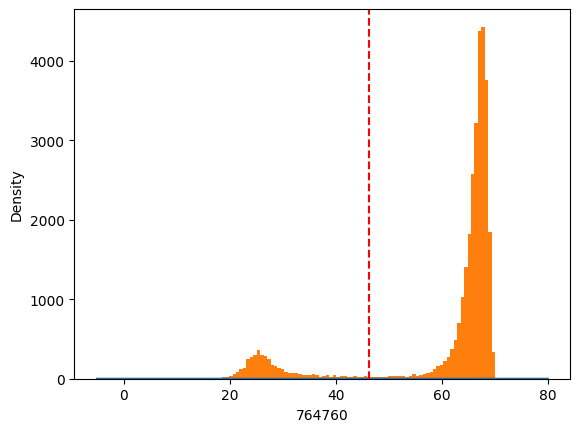

threshold: 42.583070098223374, prop: 0.13057549346321456, mode: 64.5170282913308


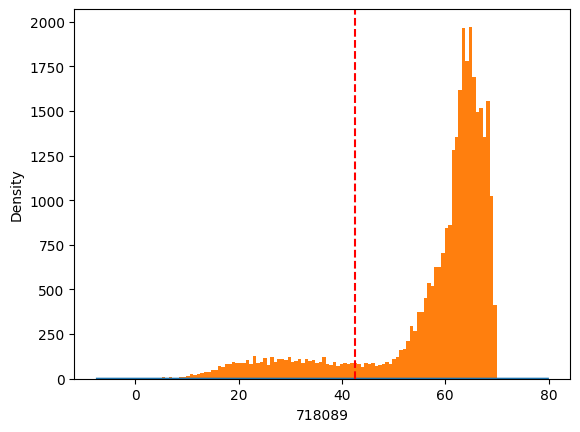

threshold: 37.49174553243641, prop: 0.14302077698940469, mode: 60.72005260711398


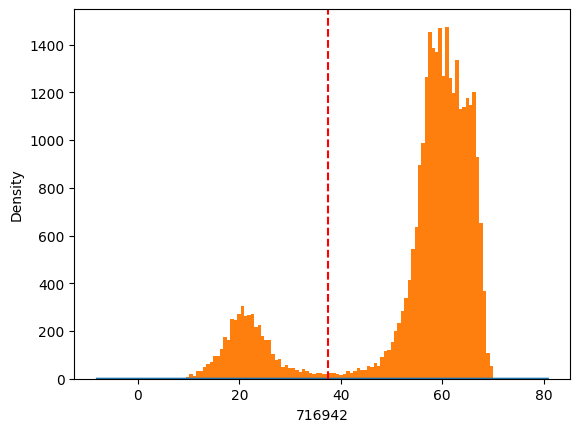

threshold: 30.32084248966249, prop: 0.11330190482257756, mode: 57.76402002899848


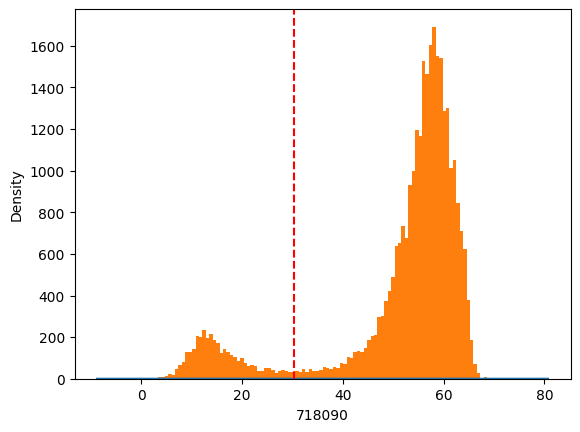

threshold: 42.35876885933004, prop: 0.20795057046650756, mode: 67.2535595339354


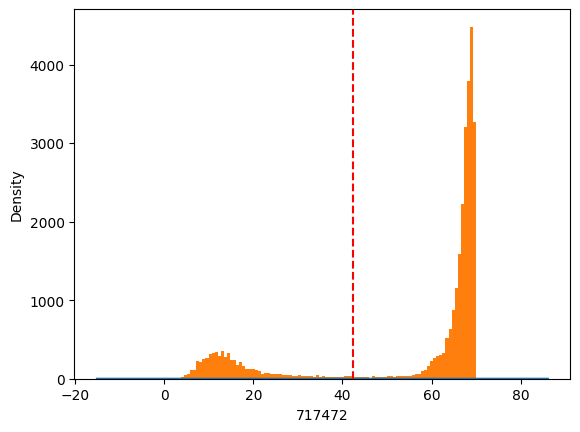

threshold: 44.0208978680385, prop: 0.15751611597271964, mode: 63.49689167847288


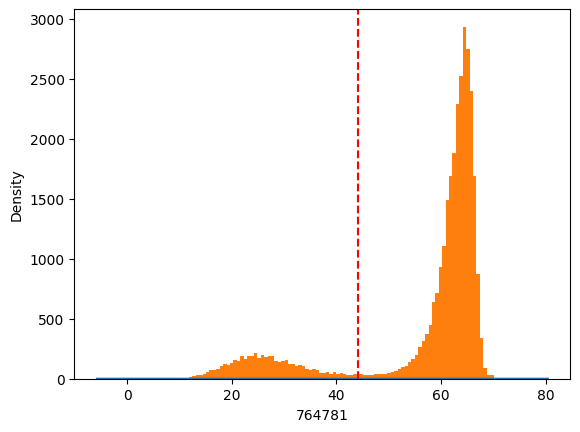

threshold: 41.26914369906767, prop: 0.18232508877951528, mode: 61.77745359013248


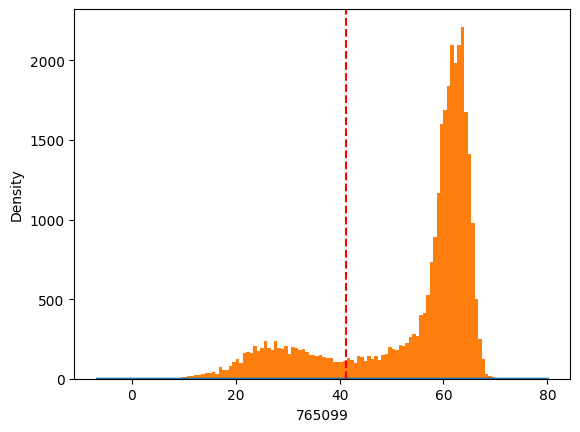

threshold: 43.623183307951216, prop: 0.13692017518621527, mode: 62.13733972374761


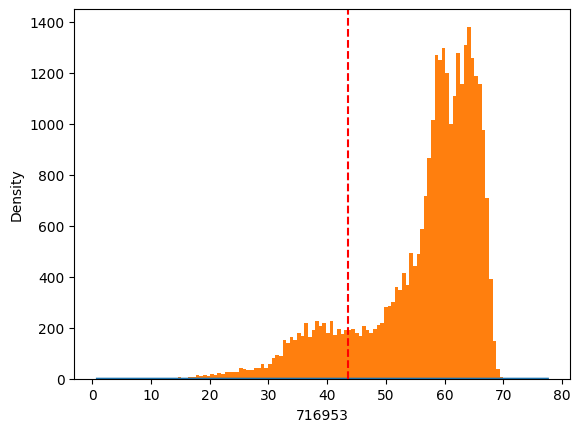

threshold: 47.09091738630412, prop: 0.20923653931727162, mode: 65.84877086195334


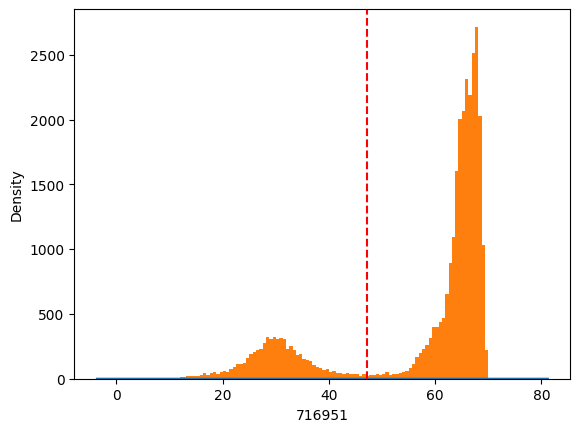

threshold: 42.88728068462573, prop: 0.1979895104895105, mode: 61.22841512862712


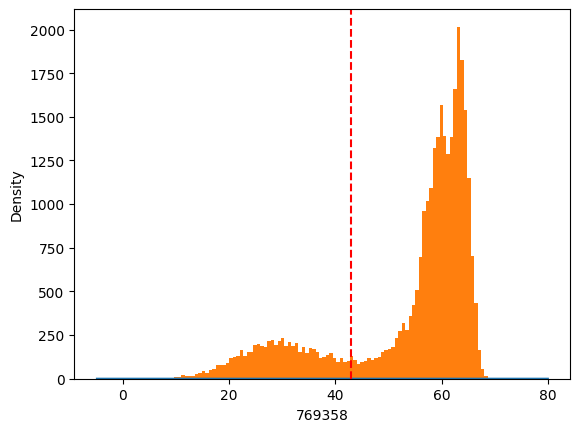

threshold: 49.429873963004255, prop: 0.14669699493816876, mode: 66.4219321370733


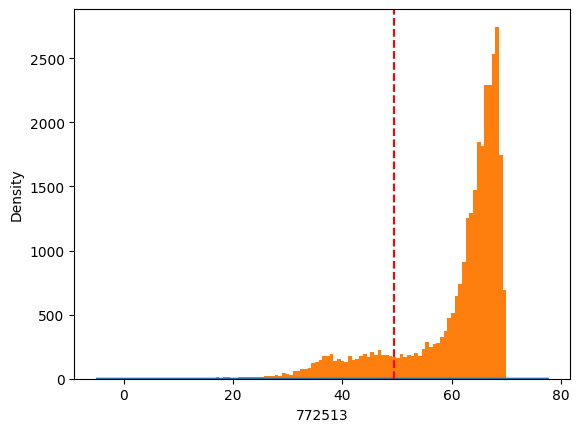

threshold: 44.36801249611156, prop: 0.20583250727464586, mode: 63.528953103109544


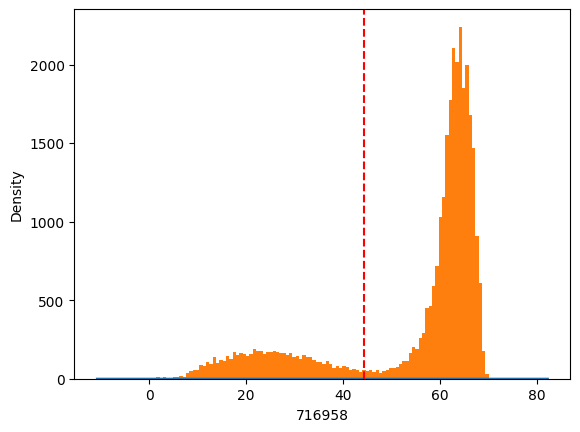

threshold: 50.229258741989604, prop: 0.28393018826688315, mode: 66.54474534850118


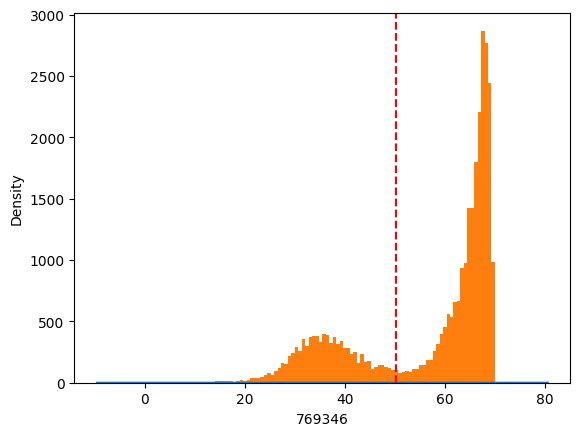

threshold: 42.659317671705196, prop: 0.1011282116107828, mode: 63.486423625756686


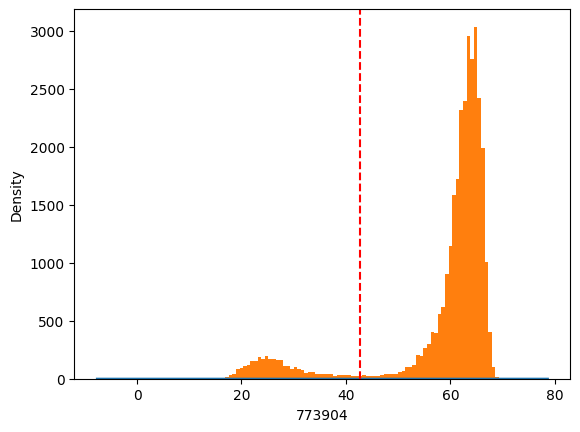

threshold: 40.96040286478792, prop: 0.46750491404324357, mode: 57.49507908074766


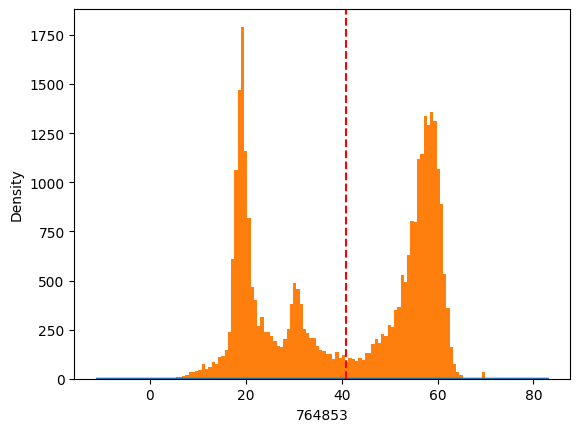

threshold: 44.42167434835521, prop: 0.2047941469049835, mode: 64.05966191628322


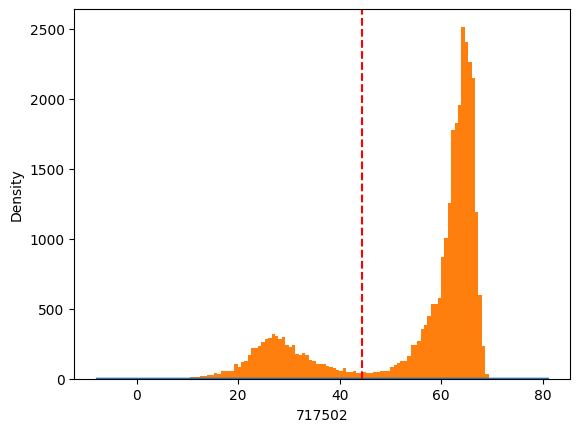

threshold: 46.01199340312783, prop: 0.2226715450285641, mode: 65.59461099651028


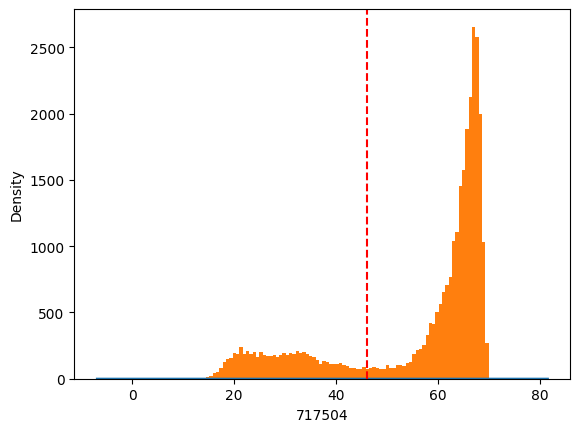

threshold: 44.17910430014645, prop: 0.15735959200692817, mode: 68.1385992251605


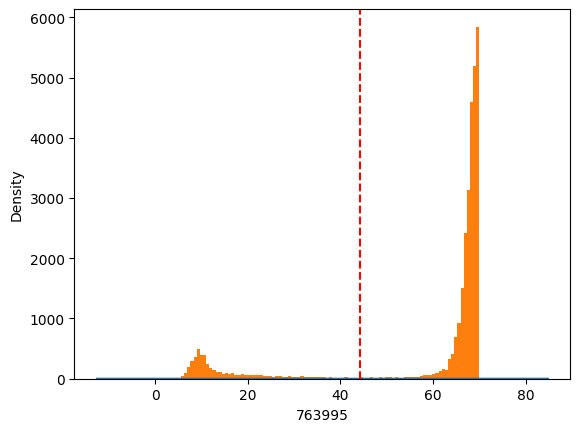

threshold: 35.00543559846936, prop: 0.14343901723744665, mode: 64.25904682091867


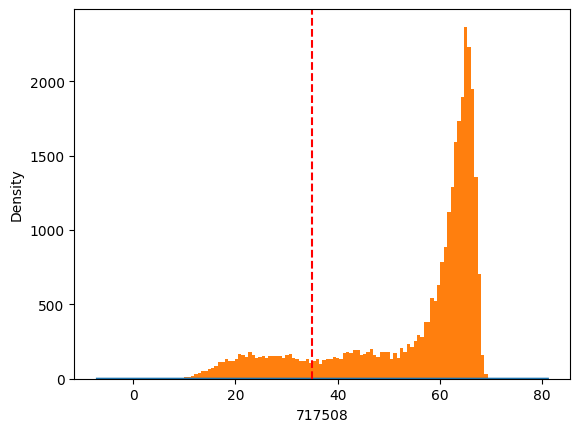

threshold: 37.25981752446417, prop: 0.23379413413039418, mode: 63.464022033318706


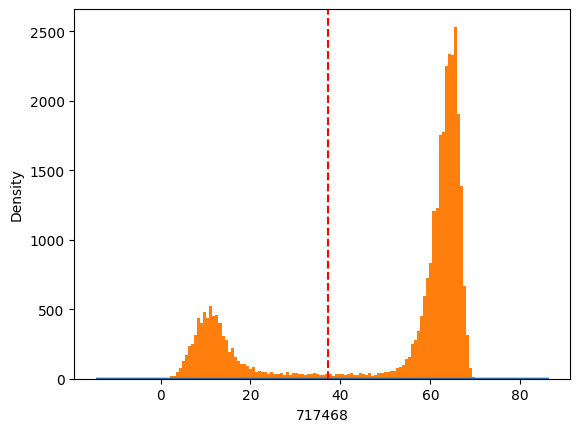

threshold: 41.38327517258476, prop: 0.1872507477567298, mode: 63.18292620809334


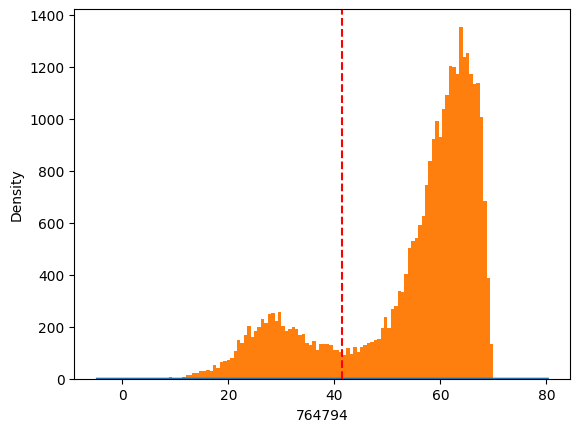

threshold: 43.70595421891248, prop: 0.2836499532855808, mode: 66.07807937059385


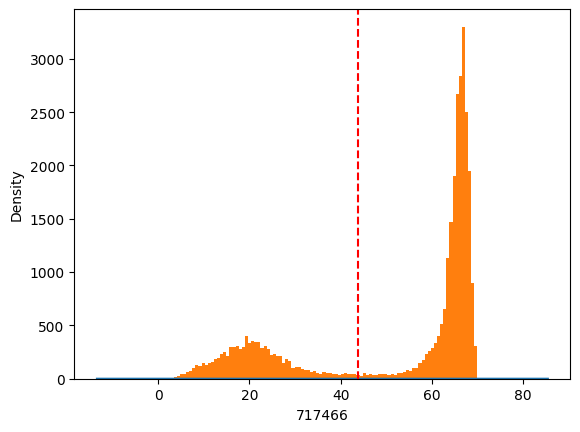

threshold: 44.23537826590614, prop: 0.4098876976426049, mode: 66.21497603583931


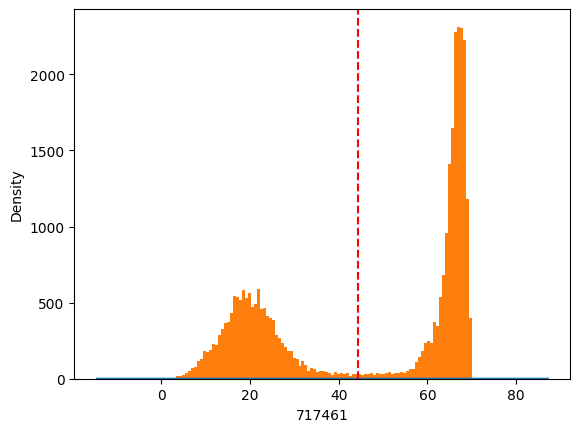

threshold: 45.20249717187113, prop: 0.34924591798579085, mode: 68.70534704239687


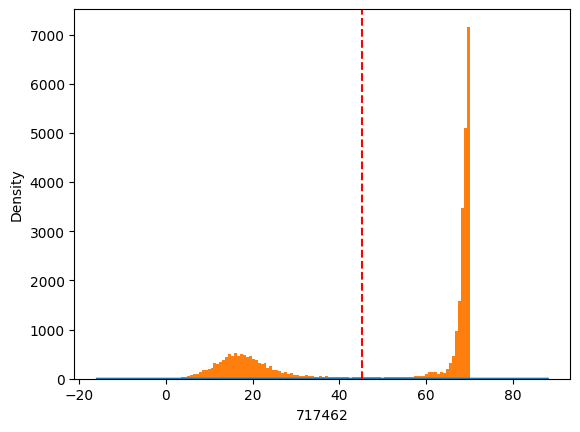

threshold: 44.57745270151949, prop: 0.19129077571406275, mode: 63.23235810455846


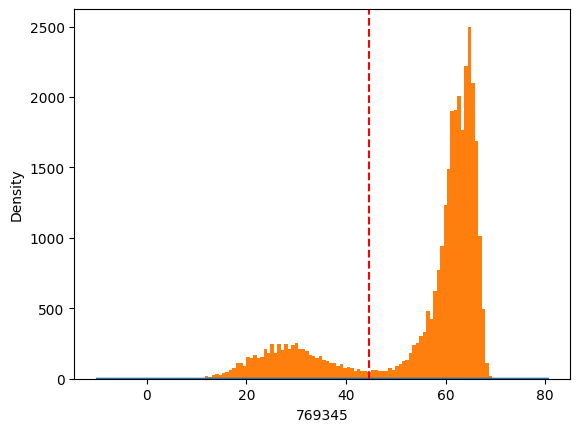

threshold: 42.76515772603278, prop: 0.18180401446203714, mode: 61.69859907266365


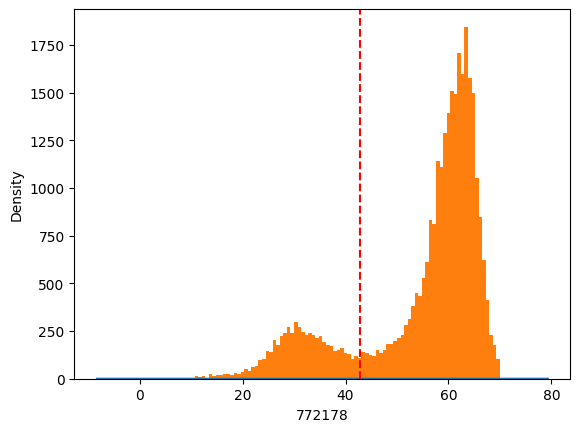

threshold: 42.509795239201985, prop: 0.24464182968929804, mode: 62.44840229740089


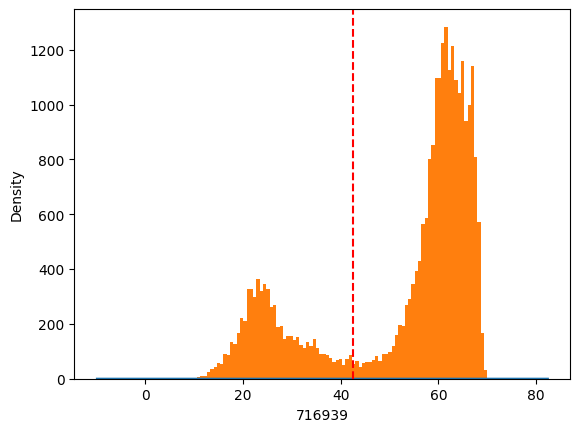

threshold: 44.36247184840053, prop: 0.12322304495891524, mode: 66.8873911978723


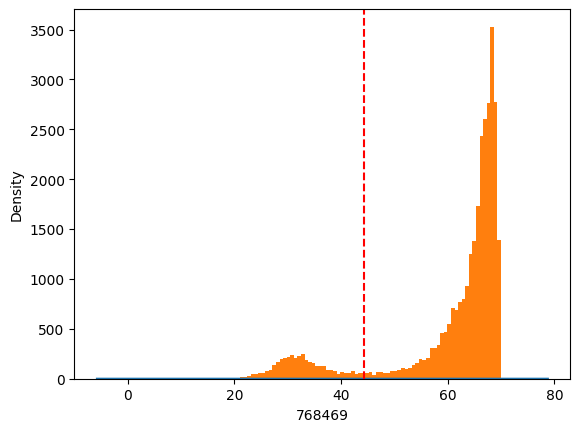

threshold: 42.3222033258027, prop: 0.4416308478166075, mode: 63.98480650049975


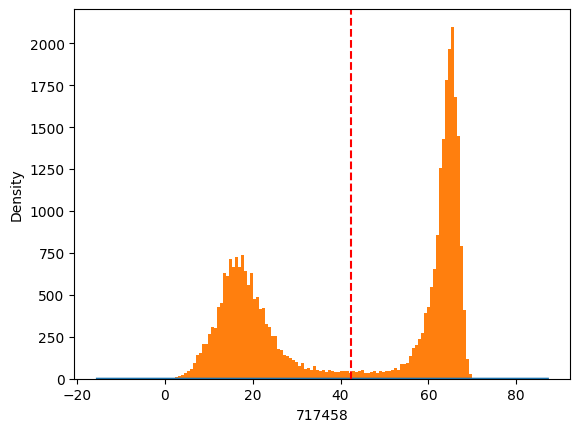

threshold: 52.713268904182996, prop: 0.5394193467651107, mode: 65.91796833752885


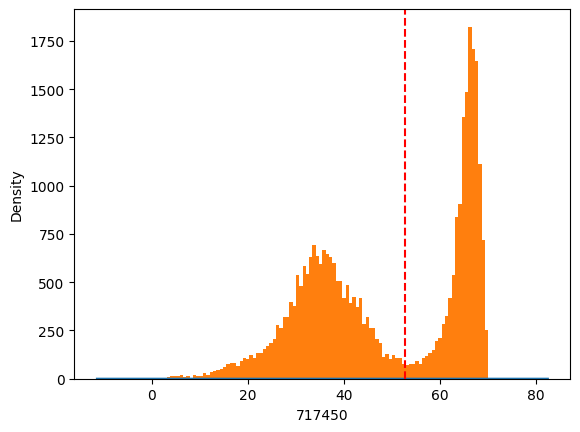

threshold: 47.63367909960117, prop: 0.533239744189674, mode: 64.02958414156036


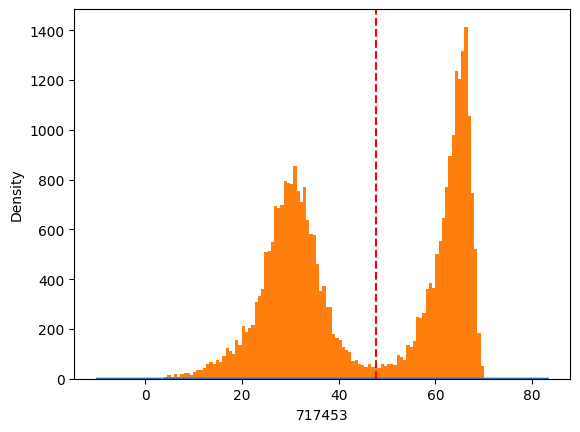

threshold: 47.98422240403519, prop: 0.10364215655650653, mode: 67.29780878865641


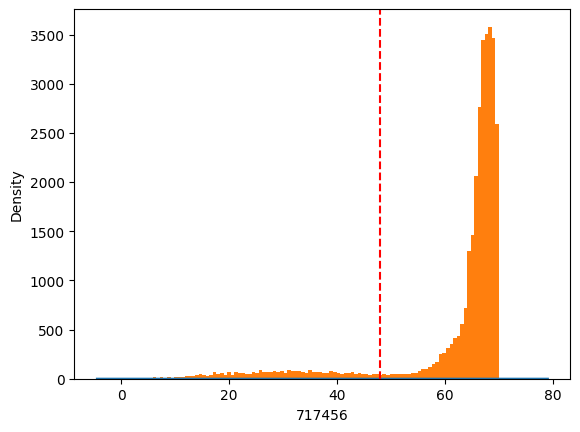

threshold: 33.98002077658508, prop: 0.24072916015258583, mode: 45.348261784971896


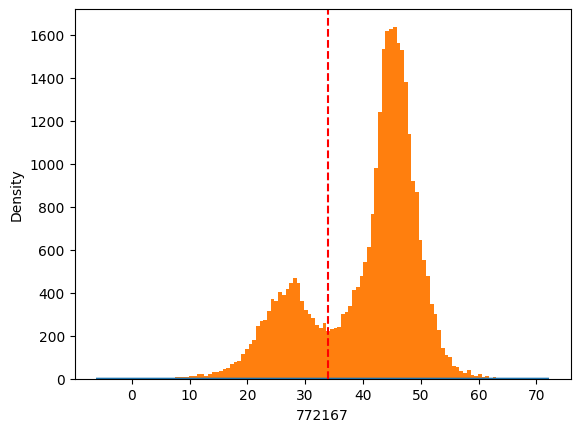

threshold: 45.45678223794629, prop: 0.10240663383003928, mode: 67.62160848909063


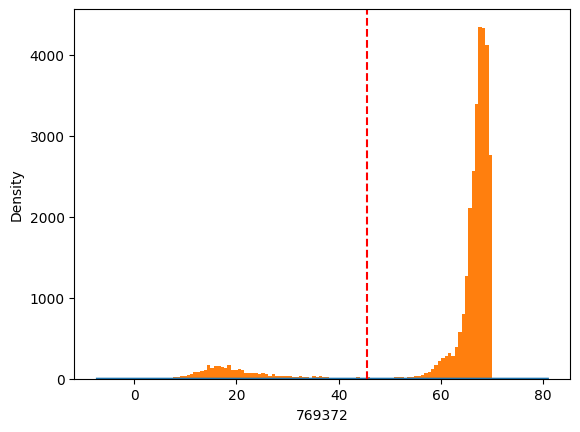

threshold: 51.59246543876509, prop: 0.21757673868376814, mode: 64.14743761023826


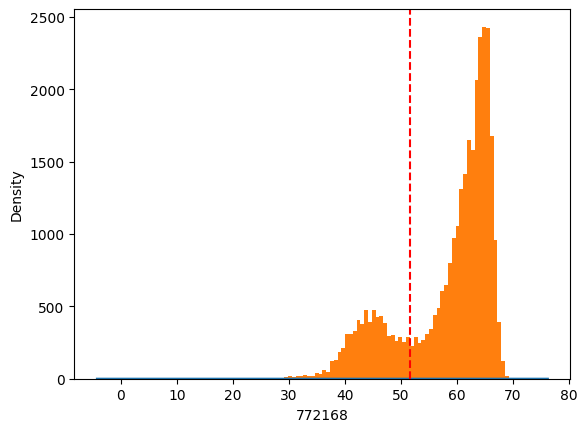

threshold: 35.003269162019876, prop: 0.14204722447199553, mode: 62.49590918296575


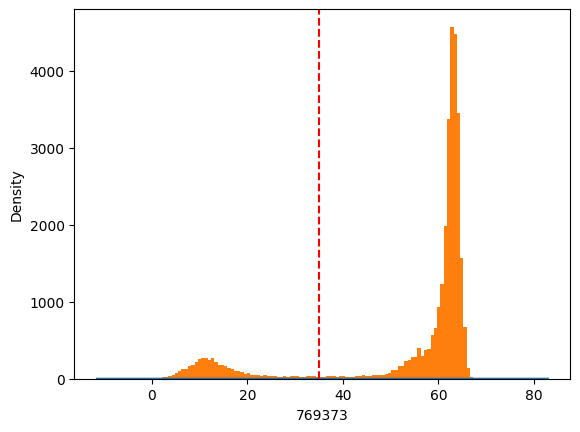

<Figure size 640x480 with 0 Axes>

In [3]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')
result = df.apply(is_bimodal, alpha = alpha)

In [4]:
# transpose the result
result = result.transpose()
result.columns = ['Proportion', 'Threshold', 'Group1 Lower', 'Group1 Median', 'Group1 Upper', 'Group2 Lower', 'Group2 Median', 'Group2 Upper']
result.index = result.index.astype(str)

In [5]:
if locations_file == 'PEMS-BAY/graph_sensor_locations_bay.csv':
    locations = pd.read_csv(locations_file, header=None)
    locations.columns = ['sensor_id', 'latitude', 'longitude']
    locations = locations.set_index('sensor_id')
else:
    locations = pd.read_csv(locations_file, index_col=1)
locations.index = locations.index.astype(str)
merged = pd.concat([locations, result], axis=1)

gdf = gpd.GeoDataFrame(
    merged, geometry=gpd.points_from_xy(merged.longitude, merged.latitude), crs="EPSG:4326"
)

In [6]:
sum(result['Proportion'] > alpha)

82

In [7]:
sum(result['Proportion'] > alpha)/len(result['Proportion'])

0.3961352657004831

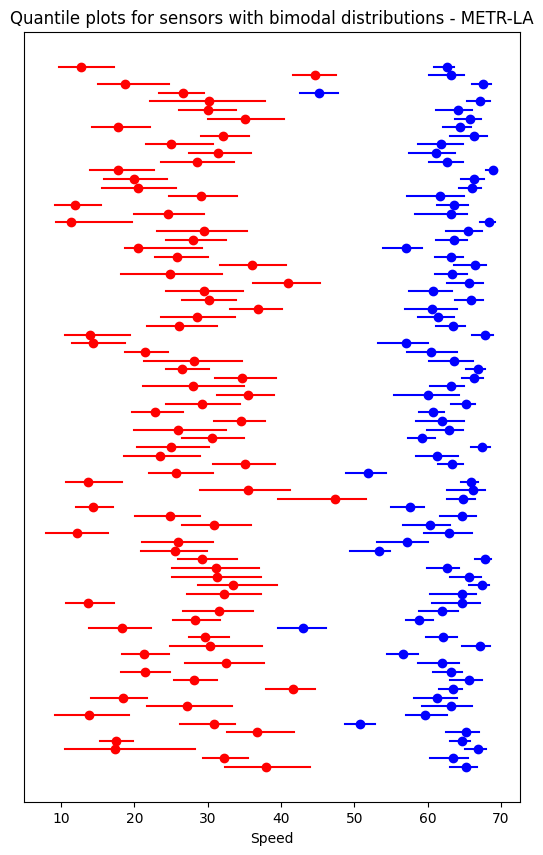

In [8]:
# draw quantile plots for the two groups for the sensors with bimodal distributions in a single figure
# for each sensor with bimodal distribution, for each group, draw a line where the two ends are the lower and upper quantiles
# and use a point to represent the median
# for each sensor, draw a different line on the y-axis
# the x-axis is the value of the quantile
# the y-axis is the sensor id, don't show the sensor id
# use blue for group 1 and red for group 2


fig, ax = plt.subplots()
for i, row in result[result["Proportion"] > alpha].iterrows():
    ax.plot([row['Group1 Lower'], row['Group1 Upper']], [i, i], 'r')
    ax.plot([row['Group2 Lower'], row['Group2 Upper']], [i, i], 'b')
    ax.plot(row['Group1 Median'], i, 'ro')
    ax.plot(row['Group2 Median'], i, 'bo')
ax.set_yticks([])
ax.set_xlabel('Speed')
ax.set_title('Quantile plots for sensors with bimodal distributions - METR-LA')
# stretch the figure to make it easier to read
fig.set_figheight(10)
# add a legend
plt.show()

In [9]:
df.columns = df.columns.astype(str)

In [10]:
import pickle
congested = [df.columns.get_loc(c) for c in result[result['Proportion'] > alpha].index if c in df]
pickle.dump(congested, open(f"{data_path}/congested.pkl", "wb"))

<Axes: >

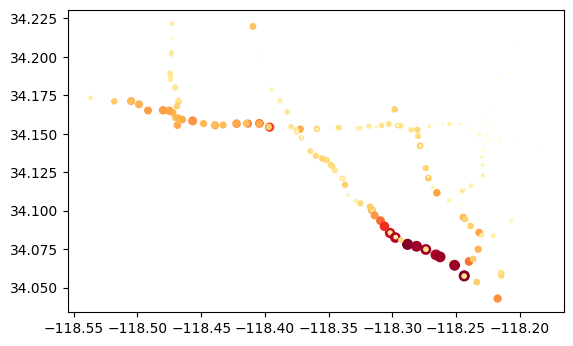

In [11]:
gdf.plot("Proportion", cmap='YlOrRd', markersize=gdf["Proportion"]*100)

In [12]:
gdf.explore("Proportion", cmap='YlOrRd', marker_kwds = {'radius': 10})